In [3]:
import numpy as np
from numpy.linalg import norm
import pandas as pd


"""
data.dat is identically the missing.dat uploaded by the professor.
The only difference is I delete the first row and last row manually.
"""
df = pd.read_table("data.dat",sep=" ",header=None)
df = df.drop(504, 1)

"""
Below is a wrong fillna method:
First try to fill NaN with forward fill method.it should be linear interpolation
Afterwards there is still some missing data. I simply fill them with the mean of the row but it is unreasonable.
"""
for i in range(10):
    df=df.fillna(axis=1, method='ffill')
df=df.fillna(df.mean(axis=1))


data=np.array(df)
LL,CC=data.shape
predata=(data[:,1:CC]-data[:,0:CC-1])/data[:,0:CC-1] # the returns
rdata=predata-(predata.mean(axis=1))[:,np.newaxis]   # demean
rdata*=100 
cov=np.matmul(rdata,rdata.transpose())/(CC-1)        # covariance matrix
print cov.shape


(947L, 947L)


In [4]:
def findMaxEigen(cov,eps=0.01):
    LL=cov.shape[0]
    vector=np.random.rand(LL)
   # vector=np.array(range(LL))
    vector=vector.reshape(LL,1)
    vector=vector/norm(vector)
    count=0
    while(True):
        tempv=np.matmul(cov,vector)
        tempv=tempv/norm(tempv)
        #print tempv[:10]
        if norm(tempv-vector)<eps:
            vector=tempv
            break
        else:
            vector=tempv
        count+=1
    tempv=np.matmul(cov,vector)
    eigenvalue=norm(tempv)/norm(vector)
    return eigenvalue,vector


In [5]:
mcov=cov
evalue=[]
evector=[]
count=0

"""
The problem here is:
after 500+, the findMaxEigen function will not be able to calculate the eigenvalue
I think it is because the cov matrix has been reduced for many times and become empty
therefore, there is a issue of convergence.
"""
for i in range(500):
    value,vector=findMaxEigen(mcov)
    count+=1
    #print count
    evalue.append(value)
    evector.append(vector)
    mcov=mcov-value*np.matmul(vector,vector.transpose())

#print evalue[:20]
#print evector[:20]

(0, 20)

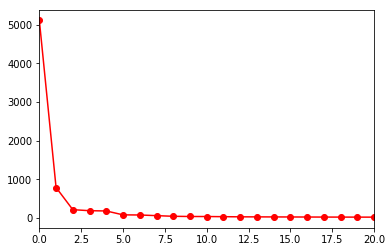

In [7]:
import pylab as pl
pl.plot(range(500),evalue,"ro-")
pl.xlim(0,20)